In [1]:
import os
import time
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver 
from selenium.webdriver.common.by import By # This needs to be used 

In [3]:
from selenium import webdriver


product="white shoes"
# Define the path to the Chrome WebDriver executable

# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# Navigate to the URL
driver.get("https://www.myntra.com/shoes?rawQuery="+product)

# Wait for the page to load (you may need to adjust the waiting time)
# You can use WebDriverWait for this purpose.
# Example: WebDriverWait(driver, 10).until(lambda x: x.find_element_by_id("element_id").is_displayed())

# Once the page is loaded, you can extract the page's text
myntra_text = driver.page_source


myntra_html = bs(myntra_text, "html.parser")  # from the markup format we are converting to html format

'<html lang="en"><head><title>Shop the Latest Shoes for Men, Women &amp; Kids Online | Best Prices &amp; Up to 50% Off | Myntra</title><meta name="theme-color" content="#fffff"><link rel="dns-prefetch preconnect" href="https://constant.myntassets.com"><link rel="dns-prefetch preconnect" href="https://assets.myntassets.com"><link rel="dns-prefetch preconnect" href="https//www.googletagmanager.com"><link rel="dns-prefetch preconnect" href="https//www.google-analytics.com"><link rel="dns-prefetch preconnect" href="https//connect.facebook.net"><link rel="dns-prefetch preconnect" href="https://www.facebook.com"><link rel="dns-prefetch preconnect" href="https://touch.myntra.com"><link rel="manifest" href="/manifest.json"><link rel="search" type="application/opensearchdescription+xml" href="https://www.myntra.com/opensearch.xml" title="Myntra Fashion Search"><link rel="apple-touch-icon" href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png">\n      <link rel="preload
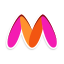

In [5]:
myntra_text

<html lang="en"><head><title>Shop the Latest Shoes for Men, Women &amp; Kids Online | Best Prices &amp; Up to 50% Off | Myntra</title><meta content="#fffff" name="theme-color"/><link href="https://constant.myntassets.com" rel="dns-prefetch preconnect"/><link href="https://assets.myntassets.com" rel="dns-prefetch preconnect"/><link href="https//www.googletagmanager.com" rel="dns-prefetch preconnect"/><link href="https//www.google-analytics.com" rel="dns-prefetch preconnect"/><link href="https//connect.facebook.net" rel="dns-prefetch preconnect"/><link href="https://www.facebook.com" rel="dns-prefetch preconnect"/><link href="https://touch.myntra.com" rel="dns-prefetch preconnect"/><link href="/manifest.json" rel="manifest"/><link href="https://www.myntra.com/opensearch.xml" rel="search" title="Myntra Fashion Search" type="application/opensearchdescription+xml"/><link href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png" rel="apple-touch-icon"/>
<link as="scrip
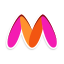

In [6]:
myntra_html

In [7]:
pclass=myntra_html.findAll("ul", {"class": "results-base"})  # similar to pattern matching in regex
# Extract the first element from the list
pclass[0]      

C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\1347420316.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  pclass=myntra_html.findAll("ul", {"class": "results-base"})  # similar to pattern matching in regex


<ul class="results-base"><li class="product-base" id="24919932"><div class="product-thumbShim"></div><div class="product-ratingsContainer"><span>4.3</span><span class="myntraweb-sprite product-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="product-ratingsCount"><div class="product-separator">|</div><!-- react-text: 442 -->9.6k<!-- /react-text --></div></div><div class="product-waterMark"> AD </div><a data-refreshpage="true" href="casual-shoes/puma/puma-carina-slim-perf-women-sneakers/24919932/buy" style="display: block;" target="_blank"><div class="product-imageSliderContainer"><div class="product-sliderContainer" style="display: block;"><div style="background: rgb(255, 237, 243);"><div style="height: 280px; width: 100%;"><picture class="img-responsive" draggable="false" style="width: 100%; height: 100%; display: block;"><source srcset="
    https://assets.myntassets.com/f_webp,dpr_1.0,q_60,w_210,c_limit,fl_progressive/assets/images/2

In [8]:
for i in pclass:
    href = i.find_all('a', href=True)
    t=(href[0]['href'])
    
   
productLink = "https://www.myntra.com/"+ t
productLink

'https://www.myntra.com/casual-shoes/puma/puma-carina-slim-perf-women-sneakers/24919932/buy'

In [9]:
driver.get(productLink)
prodRes= driver.page_source

'<html lang="en"><head><style type="text/css" id="bc-style-vjs" data-vjs-version="7.21.4">@charset "UTF-8";.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.video-js .vjs-modal-dialog,.vjs-button>.vjs-icon-placeholder:before,.vjs-modal-dialog .vjs-modal-dialog-content{position:absolute;top:0;left:0;width:100%;height:100%}.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.vjs-button>.vjs-icon-placeholder:before{text-align:center}@font-face{font-family:VideoJS;src:url(data:application/font-woff;charset=utf-8;base64,d09GRgABAAAAABDkAAsAAAAAG6gAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAABHU1VCAAABCAAAADsAAABUIIslek9TLzIAAAFEAAAAPgAAAFZRiV3hY21hcAAAAYQAAADaAAADPv749/pnbHlmAAACYAAAC3AAABHQZg6OcWhlYWQAAA3QAAAAKwAAADYZw251aGhlYQAADfwAAAAdAAAAJA+RCLFobXR4AAAOHAAAABMAAACM744AAGxvY2EAAA4wAAAASAAAAEhF6kqubWF4cAAADngAAAAfAAAAIAE0AIFuYW1lAAAOmAAAASUAAAIK1cf1oHBvc3QAAA/AAAABJAAAAdPExYuNeJxjYGRgYOBiMGCwY2BycfMJYeDLSSzJY5BiYGGAAJA8MpsxJzM9kYEDxgPKsYBpDiBmg4gCACY7BUgAeJxjYGS7wTiBgZWBgaWQ5RkDA8Mv
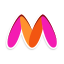

In [10]:
prodRes

<html lang="en"><head><style data-vjs-version="7.21.4" id="bc-style-vjs" type="text/css">@charset "UTF-8";.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.video-js .vjs-modal-dialog,.vjs-button>.vjs-icon-placeholder:before,.vjs-modal-dialog .vjs-modal-dialog-content{position:absolute;top:0;left:0;width:100%;height:100%}.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.vjs-button>.vjs-icon-placeholder:before{text-align:center}@font-face{font-family:VideoJS;src:url(data:application/font-woff;charset=utf-8;base64,d09GRgABAAAAABDkAAsAAAAAG6gAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAABHU1VCAAABCAAAADsAAABUIIslek9TLzIAAAFEAAAAPgAAAFZRiV3hY21hcAAAAYQAAADaAAADPv749/pnbHlmAAACYAAAC3AAABHQZg6OcWhlYWQAAA3QAAAAKwAAADYZw251aGhlYQAADfwAAAAdAAAAJA+RCLFobXR4AAAOHAAAABMAAACM744AAGxvY2EAAA4wAAAASAAAAEhF6kqubWF4cAAADngAAAAfAAAAIAE0AIFuYW1lAAAOmAAAASUAAAIK1cf1oHBvc3QAAA/AAAABJAAAAdPExYuNeJxjYGRgYOBiMGCwY2BycfMJYeDLSSzJY5BiYGGAAJA8MpsxJzM9kYEDxgPKsYBpDiBmg4gCACY7BUgAeJxjYGS7wTiBgZWBgaWQ5RkDA8MvC
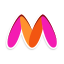

In [11]:
prodRes_html = bs(prodRes, "html.parser")
prodRes_html

In [12]:
title_h=prodRes_html.findAll("title")  # used for filtering by Title tag
# Extract the first element from the list
title=title_h[0].text
title

C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\2870290069.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  title_h=prodRes_html.findAll("title")  # used for filtering by Title tag


'Buy Puma Carina Slim Perf Women Sneakers  - Casual Shoes for Women 24919932 | Myntra'

In [13]:
overallRating=prodRes_html.findAll("div",{"class":"index-overallRating"})
print(overallRating)
for i in overallRating:
    rating_value = i.find('div').text
    
print(rating_value)


[<div class="index-overallRating"><div>4.3</div><span class="myntraweb-sprite index-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="index-separator">|</div><div class="index-ratingsCount"><!-- react-text: 88 -->9.6k<!-- /react-text --><!-- react-text: 89 --> Ratings<!-- /react-text --></div></div>]
4.3


C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\3845829559.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  overallRating=prodRes_html.findAll("div",{"class":"index-overallRating"})


In [14]:
price=prodRes_html.findAll("span",{"class":"pdp-price"})
for i in price:
    p=i.text
print(p)

₹1709


C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\61606019.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  price=prodRes_html.findAll("span",{"class":"pdp-price"})


In [15]:
Reviews=prodRes_html.find("a",{"class":"detailed-reviews-allReviews"})
t2=Reviews['href']
Review_link="https://www.myntra.com"+t2
Review_link

'https://www.myntra.com/reviews/24919932'

In [16]:
driver.get(Review_link)
review_page= driver.page_source
driver.quit()

<html lang="en"><head><title>Review - Puma Carina Slim Perf Women Sneakers</title><meta content="#fffff" name="theme-color"/><link href="https://constant.myntassets.com" rel="dns-prefetch preconnect"/><link href="https://assets.myntassets.com" rel="dns-prefetch preconnect"/><link href="https//www.googletagmanager.com" rel="dns-prefetch preconnect"/><link href="https//www.google-analytics.com" rel="dns-prefetch preconnect"/><link href="https//connect.facebook.net" rel="dns-prefetch preconnect"/><link href="https://www.facebook.com" rel="dns-prefetch preconnect"/><link href="https://touch.myntra.com" rel="dns-prefetch preconnect"/><link href="/manifest.json" rel="manifest"/><link href="https://www.myntra.com/opensearch.xml" rel="search" title="Myntra Fashion Search" type="application/opensearchdescription+xml"/><link href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png" rel="apple-touch-icon"/>
<link as="script" href="https://constant.myntassets.com/web/assets/
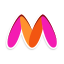

In [17]:
review_html = bs(review_page, "html.parser")
review_html


In [18]:
review=review_html.findAll("div",{"class":"detailed-reviews-userReviewsContainer"})

C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\4034511439.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  review=review_html.findAll("div",{"class":"detailed-reviews-userReviewsContainer"})


In [19]:
review

[<div class="detailed-reviews-userReviewsContainer" id="detailedReviewsContainer"><div class="user-review-userReviewWrapper"><div class="user-review-main user-review-showRating"><div class="user-review-starWrapper"><span class="user-review-starRating user-review-fiveStars"><!-- react-text: 132 -->5<!-- /react-text --><span class="user-review-starIcon"><svg height="10" viewbox="0 0 12 12" width="10" xmlns="http://www.w3.org/2000/svg"><path d="M6 9.644l2.867 1.821c.464.296.743.093.623-.45L8.724 7.56l2.581-2.657c.384-.395.25-.716-.306-.716H7.686L6.374.93c-.206-.513-.542-.512-.748 0L4.314 4.187H1.001c-.553 0-.687.324-.306.716L3.276 7.56l-.766 3.455c-.12.544.165.742.623.45L6 9.645z" fill="#FFF" fill-rule="evenodd"></path></svg></span></span></div><div class="user-review-reviewTextWrapper">The White Puma Sneaker for women is an absolute standout in both style and comfort. Its crisp white design adds a touch of sophistication to any outfit, while the sleek silhouette provides a modern edge. T

In [20]:
for i in review:
    user_rating=i.findAll("div",{"class":"user-review-main user-review-showRating"})
    user_comment=i.findAll("div",{"class":"user-review-reviewTextWrapper"})
    user_name=i.findAll("div",{"class":"user-review-left"})

C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\345188362.py:2: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  user_rating=i.findAll("div",{"class":"user-review-main user-review-showRating"})
C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\345188362.py:3: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  user_comment=i.findAll("div",{"class":"user-review-reviewTextWrapper"})
C:\Users\nmani\AppData\Local\Temp\ipykernel_27260\345188362.py:4: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  user_name=i.findAll("div",{"class":"user-review-left"})


In [21]:
len(user_rating),len(user_comment),len(user_name)

(12, 12, 12)

In [22]:
for i in range(len(user_rating)):
    rating = user_rating[i].find('span', class_='user-review-starRating').get_text().strip()
    comment=user_comment[i].text
    name = user_name[i].find('span').text
    date = user_name[i].find_all('span')[1].text    
    print(f"Date: {date},Rating: {rating},Name:{name},Comment:{comment}")

Date: 28 May 2024,Rating: 5,Name:Vedita,Comment:The White Puma Sneaker for women is an absolute standout in both style and comfort. Its crisp white design adds a touch of sophistication to any outfit, while the sleek silhouette provides a modern edge. The material feels durable yet lightweight, ensuring long-lasting wear without sacrificing flexibility. The cushioned sole offers exceptional support, making them perfect for all-day wear, whether running errands or hitting the gym. Plus, the iconic Puma logo adds a chic finishing touch. Overall, these sneakers exceed expectations in both form and function, earning a well-deserved five-star rating.
Date: 7 Apr 2025,Rating: 5,Name:Shreya Mishra,Comment:Cool, comfortable, and perennially in style, white sneakers are a wardrobe must-have, and the best ones have MVP potential. Like a crisp button-down shirt or a just-right pair of jeans, these shoes are true closet chameleons—supporting actors one moment, showstoppers the next. But there are 

In [23]:
for i in user_comment:
    com=i.text
    print(com)

The White Puma Sneaker for women is an absolute standout in both style and comfort. Its crisp white design adds a touch of sophistication to any outfit, while the sleek silhouette provides a modern edge. The material feels durable yet lightweight, ensuring long-lasting wear without sacrificing flexibility. The cushioned sole offers exceptional support, making them perfect for all-day wear, whether running errands or hitting the gym. Plus, the iconic Puma logo adds a chic finishing touch. Overall, these sneakers exceed expectations in both form and function, earning a well-deserved five-star rating.
Cool, comfortable, and perennially in style, white sneakers are a wardrobe must-have, and the best ones have MVP potential. Like a crisp button-down shirt or a just-right pair of jeans, these shoes are true closet chameleons—supporting actors one moment, showstoppers the next. But there are countless options to choose from, so finding the white sneakers that simultaneously fit your vibe and 

In [24]:
for item in user_name:
    name = item.find('span').text
    date = item.find_all('span')[1].text
    print(f"Name: {name}, Date: {date}")

Name: Vedita, Date: 28 May 2024
Name: Shreya Mishra, Date: 7 Apr 2025
Name: Surabhi Shrivastava, Date: 6 Dec 2024
Name: Yamini Sinha, Date: 24 July 2025
Name: Charmi, Date: 24 May 2025
Name: Sudiksha, Date: 7 Sept 2025
Name: Neha Parab, Date: 30 Sept 2025
Name: Kavya Bhava, Date: 29 July 2025
Name: Rahila, Date: 29 July 2025
Name: Pooja Rai, Date: 26 Mar 2025
Name: Tannu Gupta, Date: 21 Sept 2025
Name: Arpita Pandey, Date: 13 Sept 2024


In [25]:
from urllib.parse import quote


search_query = "denim jeans"
encoded_query = quote(search_query)
encoded_query

'denim%20jeans'

In [26]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Elon_Musk'

# Sending a GET request to the URL
response = requests.get(url)

# Parsing the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Finding all anchor tags (a) that contain href attribute
href_tags = soup.find_all('a', href=True)

# Extracting href attribute from anchor tags
href_links = [tag['href'] for tag in href_tags]

print(href_links)


[]
